In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
import pickle
from google.colab import files

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset
df = pd.read_csv(r'/content/drive/MyDrive/Binary_classification/train.csv')
test = pd.read_csv(r'/content/drive/MyDrive/Binary_classification/test.csv')

In [ ]:
# Checking the shape of the train dataset
df.shape

(11504798, 12)

Data Preprocessing


In [ ]:
# Check for missing values in the train dataset
df.isnull().sum()


,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
# Check for missing values in the test dataset
test.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [ ]:
# Display the first few rows of the train dataset
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [ ]:
# Display the first few rows of the test dataset
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [ ]:
# Check for duplicate rows in the train dataset

df.duplicated().sum()

0

In [ ]:
# Check for duplicate rows in the ttest dataset
test.duplicated().sum()

0

In [ ]:
# Detect and show outliers for each numerical column
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Number of outliers in {col}: {outliers.shape[0]}')


    if not outliers.empty:
        print(outliers[[col]])

Number of outliers in id: 0
Number of outliers in Age: 0
Number of outliers in Driving_License: 22757
          Driving_License
471                     0
605                     0
640                     0
1463                    0
1520                    0
...                   ...
11502248                0
11502678                0
11502804                0
11503538                0
11504025                0

[22757 rows x 1 columns]
Number of outliers in Region_Code: 0
Number of outliers in Previously_Insured: 0
Number of outliers in Annual_Premium: 2377273
          Annual_Premium
0                65101.0
3                 2630.0
9                 2630.0
11                2630.0
15               66887.0
...                  ...
11504773          2630.0
11504774         71812.0
11504788          2630.0
11504791          2630.0
11504795          2630.0

[2377273 rows x 1 columns]
Number of outliers in Policy_Sales_Channel: 0
Number of outliers in Vintage: 0
Number of outliers in Resp

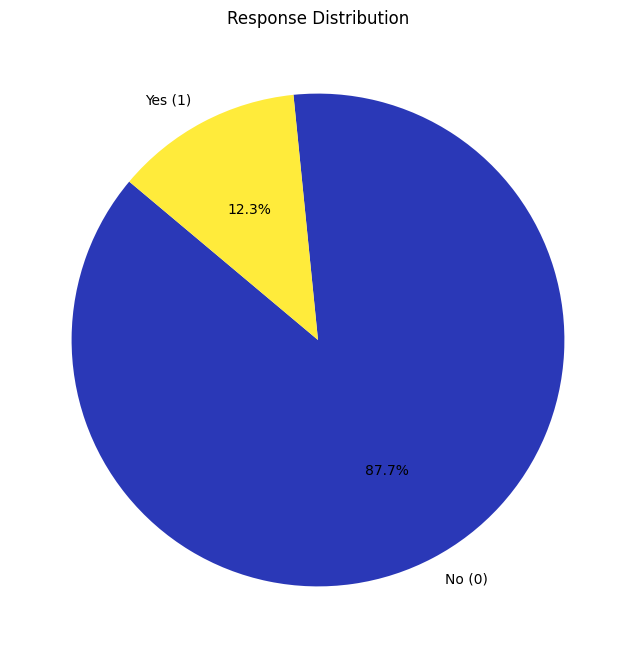

In [ ]:
# Plot the distribution of the 'Response' variable as a pie chart
response_counts = df['Response'].value_counts()
labels = ['No (0)', 'Yes (1)']
colors = ['#2a38b7','#ffeb3b']
plt.figure(figsize=(8, 8))
plt.pie(response_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Response Distribution')
plt.show()

<ipython-input-23-b3309bd4f99b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Response", data=df, palette=palette)


Text(0.5, 1.0, 'Response\xa0Distribution')

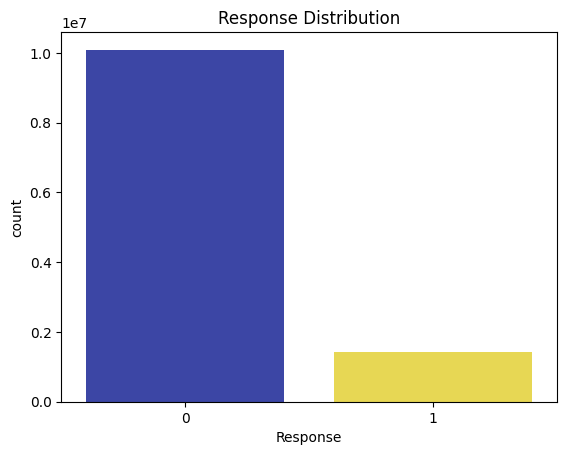

In [ ]:
# Plot the distribution of the 'Response' variable as a bar chart
palette = sns.color_palette("viridis", as_cmap=True)
palette = ["#2a38b7", "#ffeb3b"]
labels = ['No (0)', 'Yes (1)']
sns.countplot(x="Response", data=df, palette=palette)
plt.title("Response Distribution")

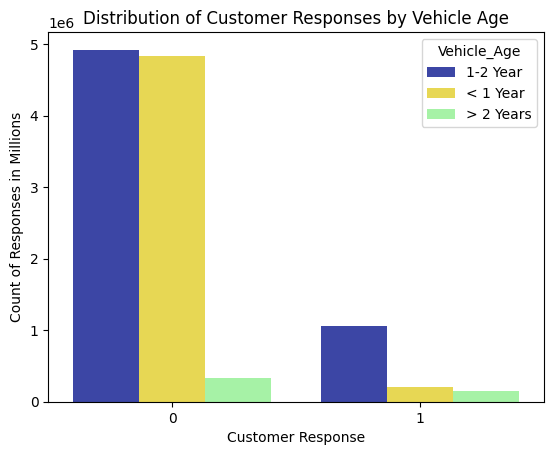

In [ ]:
# Plot the distribution of customer responses by vehicle age as a bar chart
sns.countplot(hue='Vehicle_Age', x='Response', data=df, palette=['#2a38b7', '#ffeb3b', '#99ff99'])
plt.xlabel('Customer Response')
plt.ylabel('Count of Responses in Millions')
plt.title('Distribution of Customer Responses by Vehicle Age')
plt.show()

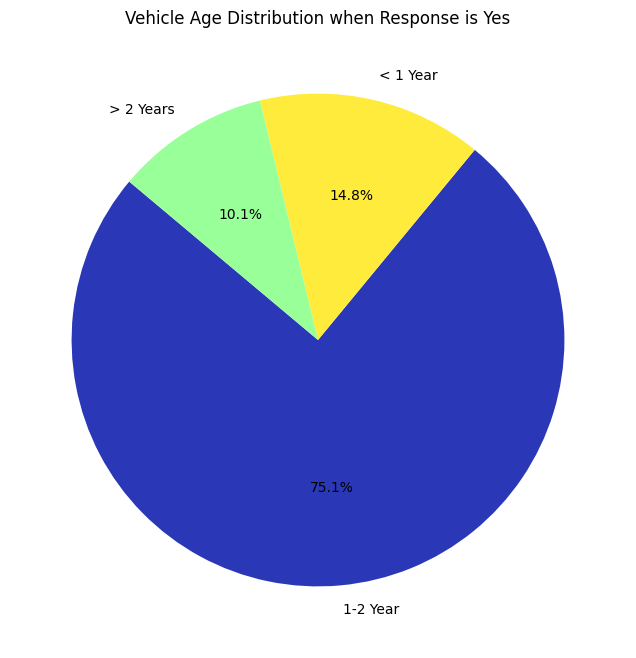

In [ ]:
# Plot the distribution of vehicle age for customers with a positive response by pie chart

response_1_data = df[df['Response'] == 1]
vehicle_age_counts = response_1_data['Vehicle_Age'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(vehicle_age_counts, labels=vehicle_age_counts.index, autopct='%1.1f%%', startangle=140, colors=['#2a38b7', '#ffeb3b', '#99ff99'])
plt.title('Vehicle Age Distribution when Response is Yes')
plt.show()

<Axes: title={'center': 'Distribution of Vehicale Damage Response yes or no'}, xlabel='Vehicle Damage', ylabel='Count of Responses in Millions'>

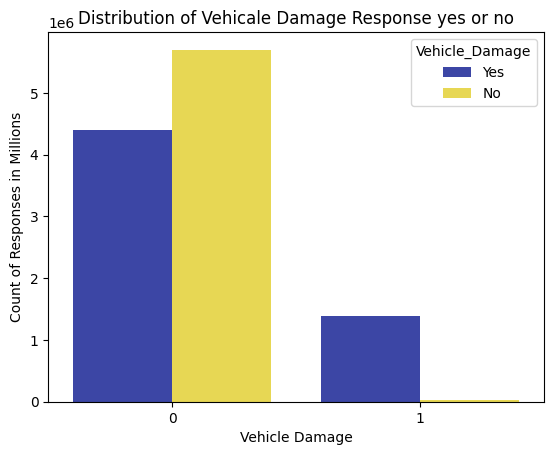

In [ ]:
#Plot the distribution of vehicle damage response
plt.xlabel('Vehicle Damage')
plt.ylabel('Count of Responses in Millions')
plt.title('Distribution of Vehicale Damage Response yes or no')
sns.countplot(hue='Vehicle_Damage', x='Response', data=df, palette=['#2a38b7', '#ffeb3b'])

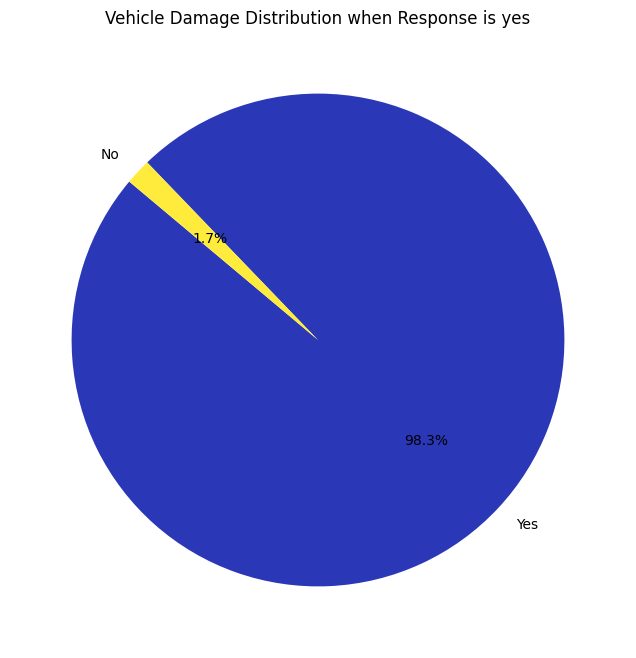

In [ ]:
# Plot the distribution of vehicle damage for customers with a positive response as a pie chart
response_1_data = df[df['Response'] == 1]
vehicle_damage_counts = response_1_data['Vehicle_Damage'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(vehicle_damage_counts, labels=vehicle_damage_counts.index, autopct='%1.1f%%', startangle=140, colors=['#2a38b7', '#ffeb3b'])
plt.title('Vehicle Damage Distribution when Response is yes')
plt.show()

<Axes: title={'center': 'Distribution Previously Insured or Previously not Insured'}, xlabel='Previously Insured', ylabel='Count of Responses in Millions'>

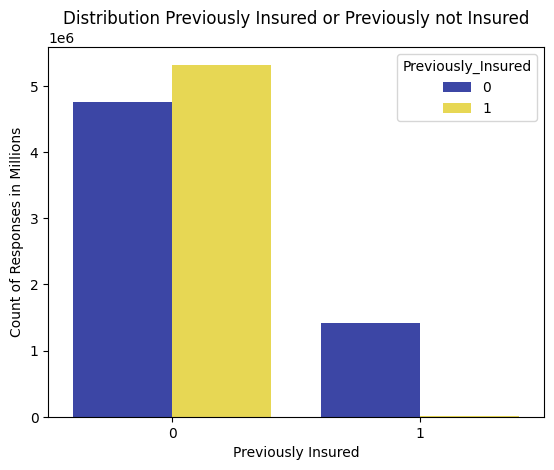

In [ ]:
# Plot the distribution of previous insurance status by response as a bar chart
plt.xlabel('Previously Insured')
plt.ylabel('Count of Responses in Millions')
plt.title('Distribution Previously Insured or Previously not Insured')
sns.countplot(hue='Previously_Insured', x='Response', data=df, palette=['#2a38b7', '#ffeb3b'])

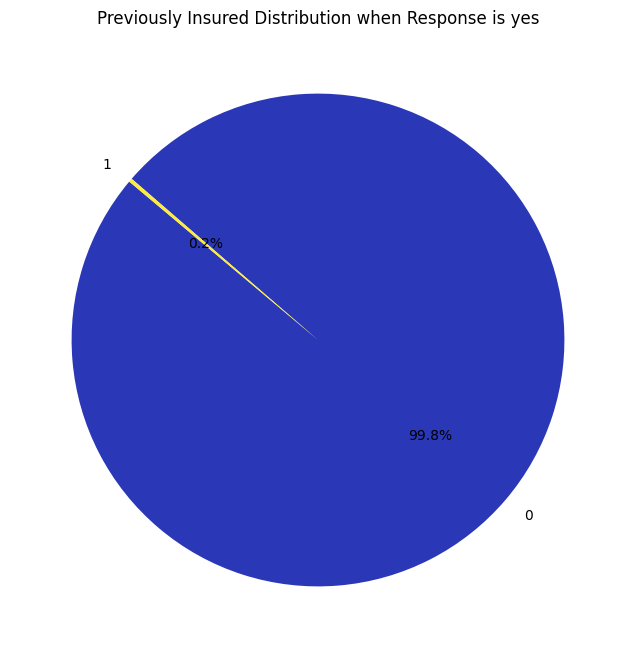

In [ ]:
# Plot the distribution of previous insurance status for positive responses as a pie chart
response_1_data = df[df['Response'] == 1]
Previously_Insured_counts = response_1_data['Previously_Insured'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Previously_Insured_counts, labels=Previously_Insured_counts.index, autopct='%1.1f%%', startangle=140, colors=['#2a38b7', '#ffeb3b'])
plt.title('Previously Insured Distribution when Response is yes')
plt.show()

<Axes: title={'center': 'Distribution of Male and Female'}, xlabel='Gender', ylabel='Count of Responses in Millions'>

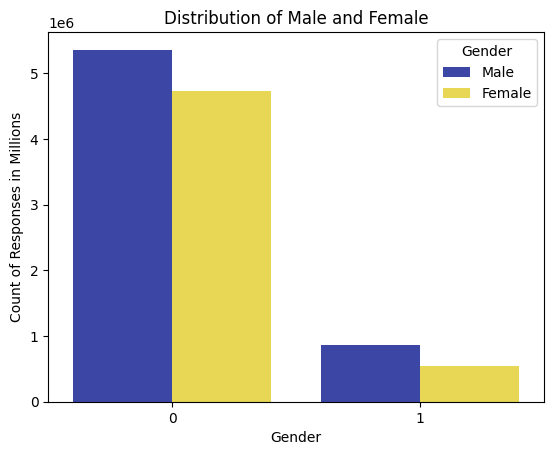

In [ ]:
# Plot the distribution of gender by response
plt.xlabel('Gender')
plt.ylabel('Count of Responses in Millions')
plt.title('Distribution of Male and Female')
sns.countplot(hue='Gender', x='Response', data=df, palette=['#2a38b7', '#ffeb3b'])

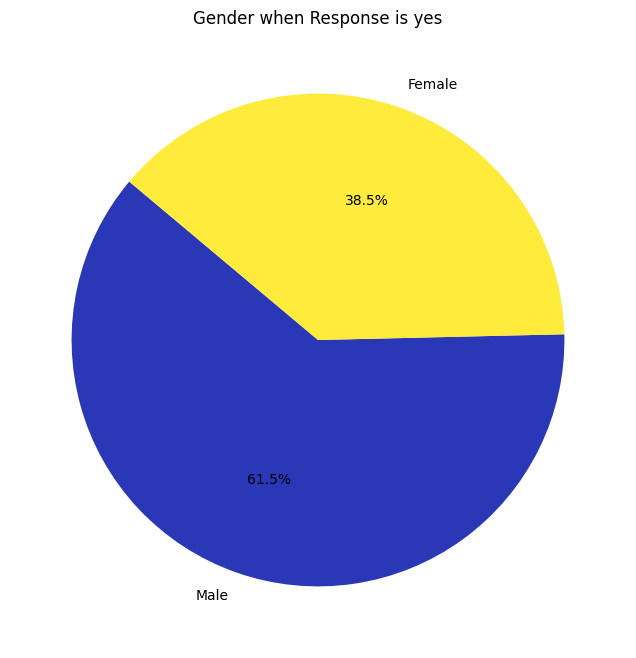

In [ ]:
# Plot the distribution of gender for positive responses
response_1_data = df[df['Response'] == 1]
Previously_Insured_counts = response_1_data['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(Previously_Insured_counts, labels=Previously_Insured_counts.index, autopct='%1.1f%%', startangle=140, colors=['#2a38b7', '#ffeb3b'])
plt.title('Gender when Response is yes')
plt.show()

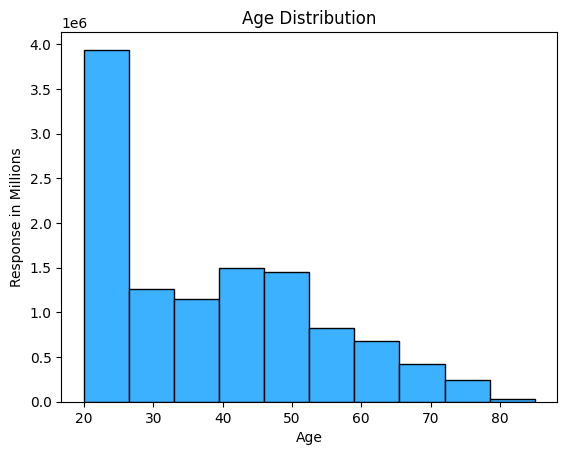

In [ ]:
# Plot the distribution of age
plt.hist(df['Age'], color='#3bb1ff', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Response in Millions')
plt.show()

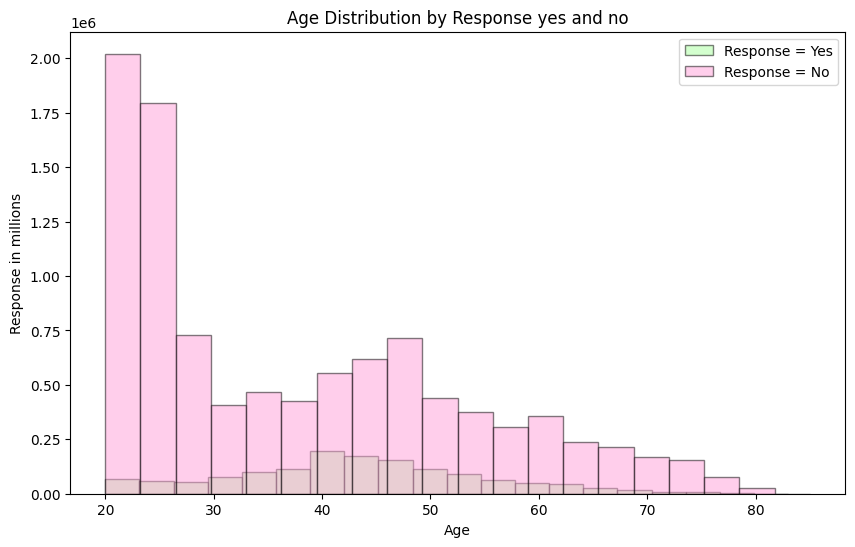

In [ ]:
# Plot the age distribution by response type
yes_response = df[df['Response'] == 1]
no_response = df[df['Response'] == 0]
plt.figure(figsize=(10, 6))
plt.hist(yes_response['Age'], bins=20, color='#a8ff9e', edgecolor='black', alpha=0.5, label='Response = Yes')
plt.hist(no_response['Age'], bins=20, color='#ff9ed8', edgecolor='black', alpha=0.5, label='Response = No')
plt.title('Age Distribution by Response yes and no')
plt.xlabel('Age')
plt.ylabel('Response in millions')
plt.legend()
plt.show()

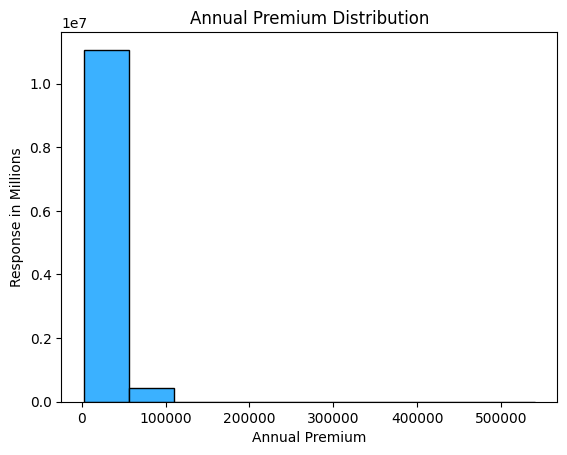

In [ ]:
# Plot the distribution of annual premium
plt.hist(df['Annual_Premium'], color='#3bb1ff', edgecolor='black')
plt.title('Annual Premium Distribution')
plt.xlabel('Annual Premium')
plt.ylabel('Response in Millions')
plt.show()

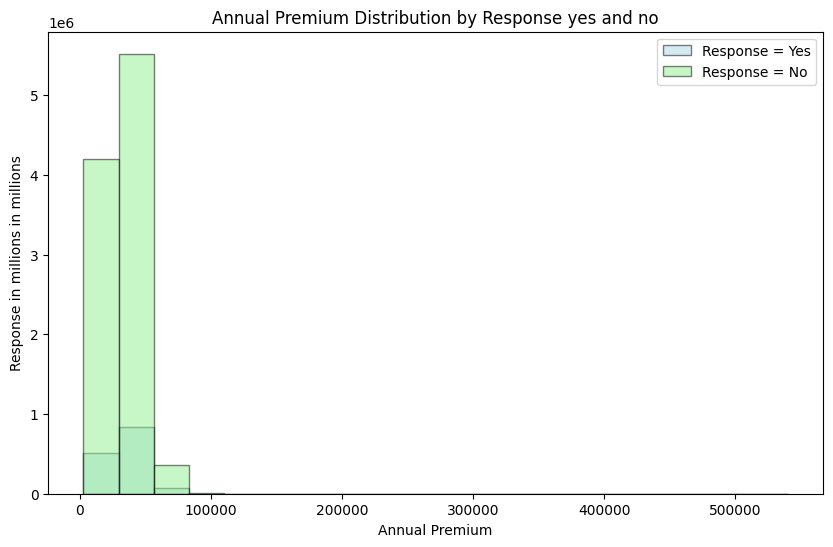

In [ ]:
# Plot the annual premium distribution by response type
yes_response = df[df['Response'] == 1]
no_response = df[df['Response'] == 0]
plt.figure(figsize=(10, 6))
plt.hist(yes_response['Annual_Premium'], bins=20, color='lightblue', edgecolor='black', alpha=0.5, label='Response = Yes')
plt.hist(no_response['Annual_Premium'], bins=20, color='lightgreen', edgecolor='black', alpha=0.5, label='Response = No')
plt.title('Annual Premium Distribution by Response yes and no')
plt.xlabel('Annual Premium')
plt.ylabel('Response in millions in millions')
plt.legend()
plt.show()

In [ ]:
# Display the column names of the train dataset
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
# Make a Function to convert categorical variables into numerical values

def words_to_int(df):
    df['Vehicle_Damage']=df['Vehicle_Damage'].map({'Yes':1,'No':0})
    df['Gender']=df['Gender'].map({'Male':1,'Female':0})
    df['Vehicle_Age'] = df['Vehicle_Age'].map({'< 1 Year':1, '1-2 Year':2,'> 2 Years':3})
    return df
df = words_to_int(df)
test = words_to_int(test)

In [ ]:
# Return the modified train dataset
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,1,21,1,35.0,0,2,1,65101.0,124.0,187,0
1,1,1,43,1,28.0,0,3,1,58911.0,26.0,288,1
2,2,0,25,1,14.0,1,1,0,38043.0,152.0,254,0
3,3,0,35,1,1.0,0,2,1,2630.0,156.0,76,0
4,4,0,36,1,15.0,1,2,0,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,1,48,1,6.0,0,2,1,27412.0,26.0,218,0
11504794,11504794,0,26,1,36.0,0,1,1,29509.0,152.0,115,1
11504795,11504795,0,29,1,32.0,1,1,0,2630.0,152.0,189,0
11504796,11504796,0,51,1,28.0,0,2,1,48443.0,26.0,274,1


In [ ]:
# Drop the 'id' column from the train dataset
df = df.drop(['id'], axis=1)

In [ ]:
# Display the training data again to confirm changes
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,21,1,35.0,0,2,1,65101.0,124.0,187,0
1,1,43,1,28.0,0,3,1,58911.0,26.0,288,1
2,0,25,1,14.0,1,1,0,38043.0,152.0,254,0
3,0,35,1,1.0,0,2,1,2630.0,156.0,76,0
4,0,36,1,15.0,1,2,0,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...
11504793,1,48,1,6.0,0,2,1,27412.0,26.0,218,0
11504794,0,26,1,36.0,0,1,1,29509.0,152.0,115,1
11504795,0,29,1,32.0,1,1,0,2630.0,152.0,189,0
11504796,0,51,1,28.0,0,2,1,48443.0,26.0,274,1


In [ ]:
# Generate a correlation matrix
correlation_matrix = df.corr()

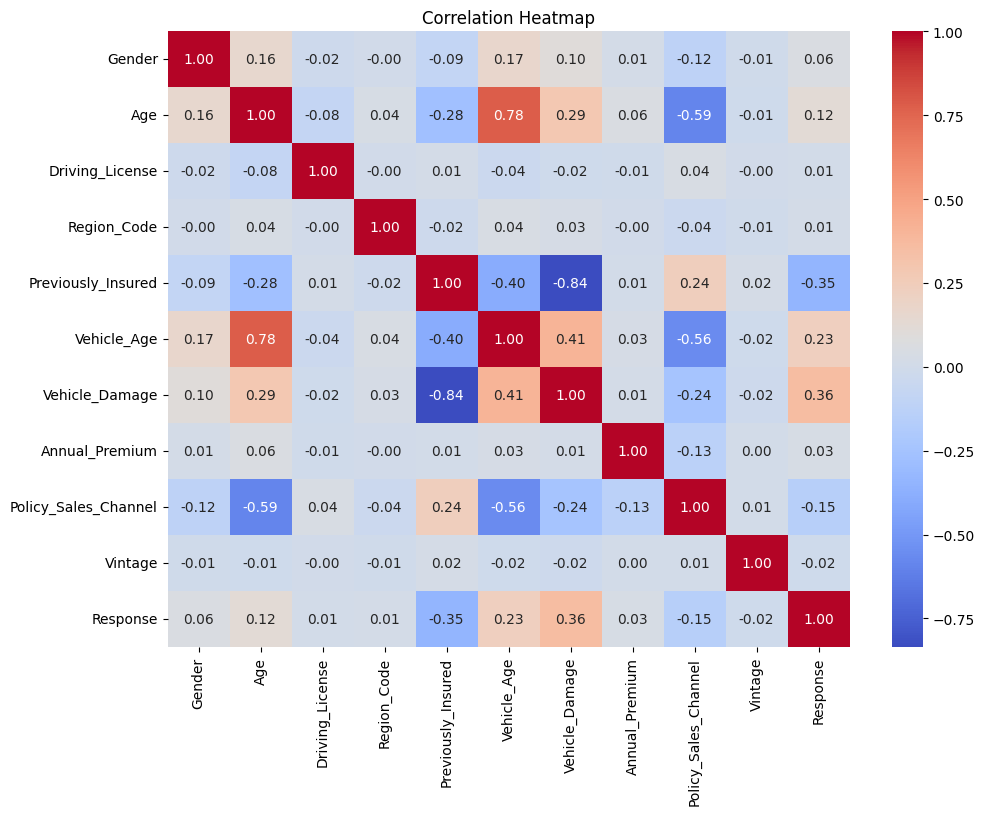

In [ ]:
# plot the  the correlation heatmap
plt.figure(figsize=(11, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Defining the features (X) and the target variable (y)
x = df.drop(['Response'], axis=1)
y = df['Response']
x_kaggle_test = test.drop(['id'], axis=1)

In [ ]:
# Display the shape of the feature set (X)
x.shape

(11504798, 10)

In [ ]:
# Show the shape of the feature set (X)
x.shape

(11504798, 10)

In [ ]:
# Show the shape of the test feature set (x_kaggle_test)
x_kaggle_test.shape

(7669866, 10)

In [ ]:
# Show the shape of the test feature set (x_kaggle_test)
x_kaggle_test.shape

(7669866, 10)

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Combine the training data for undersampling
training_data = pd.concat([x_train, y_train], axis=1)

In [ ]:
# Separate the majority and minority classes
minority_class = training_data[training_data['Response'] == 1]
majority_class = training_data[training_data['Response'] == 0]

In [ ]:
# Define the number of samples for undersampling
num_samp = len(majority_class) // 2

# Undersample the majority class
majority_class_undersampled = majority_class.sample(num_samp, random_state=42)

# Combine minority class with undersampled majority class
undersampled_df = pd.concat([minority_class, majority_class_undersampled])

# Defining X and Y variables
X = undersampled_df.drop('Response', axis=1)
y = undersampled_df['Response']

# Splitting the dataset
X_train ,X_test , y_train, y_test = train_test_split(X, y, test_size = 0.25 , random_state = 42)


# Verify the sizes of the training and testing sets
print('Train Size : ')
print('X :', X_train.shape , '\ny :' , y_train.shape, '\n\n')
print('Test Size : ')
print('X :', X_test.shape , '\ny :' , y_test.shape)

Train Size : 
X : (3875892, 10) 
y : (3875892,) 


Test Size : 
X : (1291964, 10) 
y : (1291964,)


In [ ]:
# Install the imbalanced-learn library for handling imbalanced datasets
!pip install imblearn

In [ ]:
# Import necessary libraries for handling imbalanced dataset
from collections import Counter
from imblearn.over_sampling import SMOTE

# Counting the Class values before samplingS
counter = Counter(y_train)
print('Before Sampling' , counter)

# Initializing Random Under sampler
sm = SMOTE(random_state = 31)

# Fitting the sampler
X_train_sm, y_train_sm = sm.fit_resample(X_train , y_train)
X_test_sm, y_test_sm = sm.fit_resample(X_test , y_test)

# Counting the Class values after sampling
counter = Counter(y_train_sm)
print('After Sampling' , counter)

NameError: name 'y_train' is not defined

In [ ]:
X_train_sm.shape

In [ ]:
#x_test.shape

In [ ]:
y_train.shape

In [ ]:
#y_test.shape

In [ ]:
# Import necessary libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
# Initializing and fit MinMaxScaler on the oversampled training data
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train_sm)


X_train_sm = min_max_scaler.transform(X_train_sm)
x_test = min_max_scaler.transform(X_test_sm)
x_kaggle_test = min_max_scaler.transform(x_kaggle_test)

# Model Training Phase

In [ ]:
# Import necessary libraries for model training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# Make  function to check and print model accuracy, precision, recall, and F1 score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def check_test_accuracy(y_test, pred):
    # Indent the code within the function
    print("Accuracy : {:.2f}%". format (accuracy_score(y_test, pred) *100))
    print("Precision: {:.2f}%".format(precision_score(y_test, pred) * 100))
    print("Recall: {:.2f}%".format(recall_score(y_test, pred) * 100))
    print("F1: {:.2f}%".format(f1_score(y_test, pred) * 100))
    print("==========================")


In [ ]:
# Train and evaluate various machine learning models

**Logistic Regression

In [ ]:
# Logistic Regression model

lr = LogisticRegression()
lr.fit(X_train_sm, y_train_sm)

train_pred = lr.predict(X_train_sm)
test_pred = lr.predict(X_test_sm)

print("==Training Accuracy==")
check_test_accuracy(y_train_sm, train_pred)
print("==Testing Accuracy==")
check_test_accuracy(y_test_sm, test_pred)

Multinomial naive Base

In [ ]:
# Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train_sm, y_train_sm)

train_pred = mnb.predict(X_train_sm)
test_pred = mnb.predict(X_test_sm)

print("==Training Accuracy==")
check_test_accuracy(y_train_sm, train_pred)
print("==Testing Accuracy==")
check_test_accuracy(y_test_sm, test_pred)

Decision Tree

In [ ]:
# Decision Tree model

dt = DecisionTreeClassifier()
dt.fit(X_train_sm, y_train_sm)

train_pred = dt.predict(X_train_sm)
test_pred = dt.predict(X_test_sm)

print("==Training Accuracy==")
check_test_accuracy(y_train_sm, train_pred)
print("==Testing Accuracy==")
check_test_accuracy(y_test_sm, test_pred)

Random Forest

In [ ]:
# Random Forest model

rf = RandomForestClassifier()
rf.fit(X_train_sm, y_train_sm)

train_pred = rf.predict(X_train_sm)
test_pred = rf.predict(X_test_sm)

print("==Training Accuracy==")
check_test_accuracy(y_train_sm, train_pred)
print("==Testing Accuracy==")
check_test_accuracy(y_test_sm, test_pred)

*Support* Vector machine

In [ ]:
# Support Vector Machine model

svm = SVC()
svm.fit(X_train_sm, y_train_sm)

train_pred = svm.predict(X_train_sm)
test_pred = svm.predict(X_test_sm)

print("==Training Accuracy==")
check_test_accuracy(y_train_sm, train_pred)
print("==Testing Accuracy==")
check_test_accuracy(y_test, test_pred)

#Hyperparameters Tunning

In [ ]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
# Defining the parameter grid for tuning the Decision Tree model
param_grid = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Performing GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_sm, y_train_sm)

In [ ]:
# Selecting the best model from GridSearchCV
bdt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predicting the test set using the best model
y_pred = bdt.predict(X_test)

# Check the accuracy of the tuned model
check_test_accuracy(y_test, y_pred)

#accuracy = accuracy_score(y_test, y_pred)
#print(f"Test Set Accuracy: {accuracy:.2f}")

# Feature Selection

In [ ]:
# Determining feature importance from the best Decision Tree model
feature_importances = bdt.feature_importances_

# Creating DataFrame to show feature importance
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

# Sorting feature importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Ploting feature importance using a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df, palette='coolwarm')
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [ ]:
!pip install scikit-learn

 ROC Curve

In [ ]:
# ROC Curve plotting function
def plot_roc_curve(model, x_test, y_test):
    y_pred_prob = model.predict_proba(x_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
# Import necessary libraries for ROC curve plotting
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [ ]:
# Plotting ROC Curve for the best Decision Tree model
plot_roc_curve(bdt, X_test_sm, y_test_sm)

In [ ]:
# Read sample submission file for Kaggle competition
yt=pd.read_csv(r'/content/drive/MyDrive/Binary_classification/sample_submission.csv')

In [ ]:
# Show unique response values in the sample submission file
unique_responses = yt['Response'].unique()

print("Unique Response Values:", unique_responses)

In [ ]:
yt

In [ ]:
# Predict using the Kaggle test data with the best Decision Tree model

kaggle_test_pred = bdt.predict(x_kaggle_test)

kaggle_test_pred

In [ ]:
# Converting predicted values into appropriate format for submission

def words_to_int(dff):
    if dff == 0:
        return 0.5
    if dff == 1:
        return 1

# Apply the function to each element in the array
test_predictionss = [words_to_int(x) for x in kaggle_test_pred]

In [ ]:
# Create a submission DataFrame
submission = pd.DataFrame({'id': yt['id'], 'Response': test_predictionss})

In [ ]:
# Display the submission DataFrame
submission

In [ ]:
submission.to_csv('/content/drive/MyDrive/Binary_classification/submission1.csv', index=False)

Software Artifact

In [ ]:
# Save the model as a pickle file for deployment
import pickle
from google.colab import files

In [5]:
model_filename = 'insurance_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(bdt, file)

NameError: name 'bdt' is not defined

In [ ]:
# Download the model file
files.download(model_filename)

In [ ]:
# Showing information about the scikit-learn package
!pip show scikit-learn